# Computing phases for an equilateral triangle of Verticals

## A quick note on angles before getting started
There are two common units in which to express angles: degrees, which we all know and love, and radians.  Radians are used throughout physics and engineering to specify angles, so we give a quick refresher here.  Let the greek letter phi ($\phi$) represent an angle.  There are $2 \pi$ radians in 360 degrees.  This means the translation between the two is
$$\phi_{deg} = \phi_{rad}\frac{180}{\pi}$$
and
$$\phi_{rad} = \phi_{deg}\frac{\pi}{180}$$

So, here's a quick example.  Let's say I want to translate 45 degrees into radians

$$
\phi_{rad} = 45\frac{\pi}{180} = \frac{\pi}{4}\text{radians}
$$


## The physics of phase matching
If I have two radiators that emit waves, those waves will "interfere" with each other.  We say these waves are "in phase" when the peaks and troughs coincide.  We say they are "180 degrees" out of phase when their peaks an troughs cancel each other out.

If I want two radiors to maximize their power into a given direction, I need to make sure that those waves are "in phase" at a receiver located in that direction.  Let's draw a picture of these two radiators (call then "a" and "b") and a reciever located far away from then at some angle.  We will use the greek letters theta, $\theta$, to designate the angles the extra element and receiver make with the x axis.  Look at this figure.

In [ ]:
import numpy as np
import easier as ezr
import pylab as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config Completer.use_jedi = False

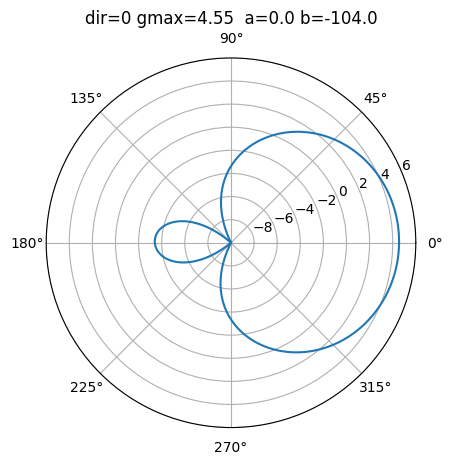

In [228]:
class Element:
    c = 3e8
    def __init__(self, freq, r0_vector_in_wavelengths, phase=0, name=''):
        self.phi0 = phase 
        self.f = freq
        self.lamda = self.c / self.f
        self.k = 2 * np.pi / self.lamda
        self.r0 = self.lamda * np.array(r0_vector_in_wavelengths)
        self.name = name
        
    def phase_to(self, r_vector):
        R_vector = np.array(r_vector) - self.r0
        R_mag = np.sqrt(np.sum(R_vector ** 2, axis=-1))
        phase = self.k * R_mag
        return np.exp(1j * (phase - self.phi0))
    
    @ezr.cached_property
    def r(self):
        return np.sqrt(np.sum(self.r0 ** 2)) / self.lamda
    
    def set_phase(self, phase):
        self.phi0 = phase
    
    
class Array:
    def __init__(self, freq, coords, names=None):
        """
        args = list of lists.  [[x1, y1, phase_radians1], ... [xN, yN, phase_radiansN]]
        """
        if names is None:
            names = ['' for c in coords]
        self.elements = [Element(freq, coord, name=name) for (coord, name) in zip(coords, names)]
        
    def plot_elements(self):
        x = []
        y = []
        names = []
        for el in self.elements:
            x.append(el.r0[0] / el.lamda)
            y.append(el.r0[1] / el.lamda)
            names.append(el.name)
            
        ax = ezr.figure(figsize=(3, 3), grid=False)
        ax.scatter(x, y)
        
        for (xi, yi, name) in zip(x, y, names):
            if name:
                ax.text(xi, yi, name, ha='left', va='bottom', size='large')
        ax.axis('square')
        ax.set_xlabel('x')
        ax.set_ylabel('y')

    def plot_pattern(self, show=True):
        r = 1000 * max([e.r for e in self.elements])
        phi = np.linspace(0, 2 * np.pi, 3000)
        x_vals = r * np.cos(phi)
        y_vals = r * np.sin(phi)
        XY = np.vstack((x_vals, y_vals)).T
        
        Z = np.zeros_like(phi)
        for element in self.elements:
            Z = Z + element.phase_to(XY)
            
        P = (np.conj(Z) * Z).real
        P = P / np.mean(P)
        
        P = 10 * np.log10(P + 1e-6)
        P = np.maximum(P, -20)

        fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
        ax.plot(phi, P)
        ax.grid(True)
        
        min_val = np.max([-10, np.floor(np.min(P)) - 1])
        max_val = np.ceil(np.max(P)) + 1
        ax.set_ylim(min_val, max_val)
        ax.set_title(f'gmax={np.round(np.max(P), 2)}', va='bottom')
        if show:
            plt.show()
        return ax
        
        
        
class DeltaArray(Array):
    def __init__(self, freq, side_in_wavelengths=.25):
        k = 2 * np.pi
        s = side_in_wavelengths
        self.s, self.k = s, k
        
        theta_b = np.pi / 6
        
        coords = [
            [0, 0],
            [s * np.cos(theta_b), .5 * s],
            [0, s] 
        ]
        
        names = [
            'a',
            'b',
            'c',
        ]
        
        super().__init__(freq, coords, names)
        
    def plot_pattern(self, theta_degrees):
        theta = np.pi * theta_degrees / 180
        s = self.s
        k = self.k
        phase_lookup = {
            'a': 0,
            'b': -k * s * np.cos(theta - np.pi / 6),
            'c': -k * s * np.cos(theta - np.pi / 2)                     
        }
        self.phase_lookup = phase_lookup
        for element in self.elements:
            element.set_phase(phase_lookup[element.name])
        ax = super().plot_pattern(show=False)
        phase_a = np.round(phase_lookup['a'] * 180 / np.pi, 0)
        phase_b = np.round(phase_lookup['b'] * 180 / np.pi, 0)
        
        title = f'dir={theta_degrees} {ax.get_title()}  a={phase_a} b={phase_b}'
        ax.set_title(title)
        
        
array = DeltaArray(freq=7.15e6,  side_in_wavelengths=1/3)
array.plot_pattern(0)

In [206]:
pd.Series(array.phase_lookup) * 180 / np.pi

a     0.000000
b   -77.942286
c   -63.639610
dtype: float64

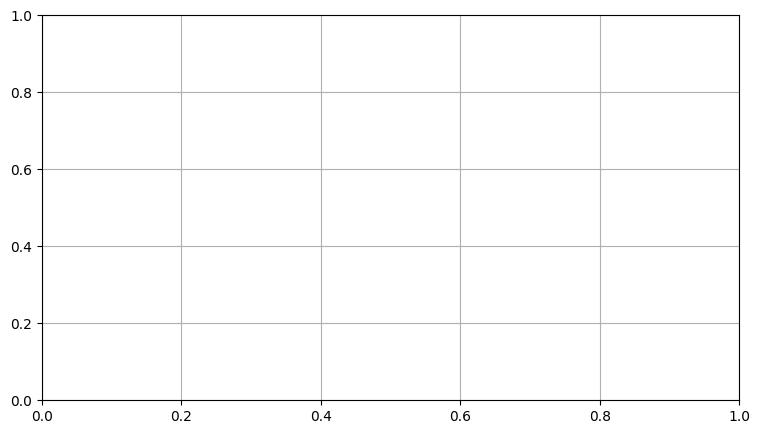

In [185]:
ax = ezr.figure()

In [157]:
.962*2

1.924

In [158]:
.166*2

0.332